**LOADING THE CORPUS DATASET**


The 'text' column in corpus.csv created is then enclosed by single quotes and is stored as 'strings' column in Microsoft Excel.

In [1]:
import pandas as pd

corpus = pd.read_csv(r"C:/Users/Sam/Desktop/corpus.csv")
corpus.head(5)

,years,text,strings
0,2020,valence extraction using em selection and cooc...,'valence extraction using em selection and coo...
1,2020,on the vocabulary of grammarbased codes and th...,'on the vocabulary of grammarbased codes and t...
2,2020,the latent relation mapping engine algorithm a...,'the latent relation mapping engine algorithm ...
3,2019,the modular audio recognition framework marf a...,'the modular audio recognition framework marf ...
4,2020,les entites spatiales dans la langue etude de...,'les entites spatiales dans la langue etude d...


In [2]:
corpus = corpus.drop(['text'], axis=1)
corpus.head(5)

,years,strings
0,2020,'valence extraction using em selection and coo...
1,2020,'on the vocabulary of grammarbased codes and t...
2,2020,'the latent relation mapping engine algorithm ...
3,2019,'the modular audio recognition framework marf ...
4,2020,'les entites spatiales dans la langue etude d...


In [3]:
corpus.shape

(33927, 2)

In [4]:
corpus['years'].value_counts()

2022    10735
2021     8144
2020     6684
2019     4911
2018     3453
Name: years, dtype: int64

**CONVERTING 'strings' IN THE DATAFRAME TO A LIST**

In [5]:
doc_corpus = ', '.join(corpus['strings'].astype(str))
type(doc_corpus)

str

In [6]:
corpus_list = doc_corpus.split(",")
type(corpus_list)

list

In [7]:
len(corpus_list)

33927

**CREATING A TF-IDF DTM FROM corpus_list**

In [8]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_df = 0.5)

#learns the vocabulary and the idf -> returns a DTM
X = vectorizer.fit_transform(corpus_list)
X.shape

(33927, 86159)

In [9]:
X

<33927x86159 sparse matrix of type '<class 'numpy.float64'>'
	with 2898429 stored elements in Compressed Sparse Row format>

In [10]:
type(X)

scipy.sparse._csr.csr_matrix

In [11]:
X_df = pd.DataFrame(X.todense())
X_df

,0,1,2,3,4,5,6,7,8,9,...,86149,86150,86151,86152,86153,86154,86155,86156,86157,86158
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33925,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#getting number of nonzeros in each row
X_df.astype(bool).sum(axis=1)

0         85
1         77
2         83
3         75
4        104
        ... 
33922     75
33923    102
33924     49
33925     67
33926     76
Length: 33927, dtype: int64

**DETECTING SIMILARITIES AMONG DOCUMENTS**

In [13]:
X_df["years"] = corpus["years"]

In [14]:
X_df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,86150,86151,86152,86153,86154,86155,86156,86157,86158,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2020


In [15]:
X_pivot = X_df.pivot_table(index='years')
X_pivot

,0,1,2,3,4,5,6,7,8,9,...,86149,86150,86151,86152,86153,86154,86155,86156,86157,86158
years,,,,,,,,,,,,,,,,,,,,,
2018,0.000000,0.000099,0.000000,0.000000,0.000000,0.000059,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019,0.000030,0.000054,0.000000,0.000024,0.000000,0.000000,0.000049,0.000026,0.000000,0.000019,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.000000
2020,0.000021,0.000094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000021,0.000000,...,0.000000,0.000000,0.000022,0.000028,0.000000,0.000011,0.000000,0.000000,0.000000,0.000145
2021,0.000019,0.000054,0.000025,0.000000,0.000000,0.000000,0.000000,0.000019,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000027,0.000018,0.000059,0.000000,0.000019,0.000000,0.000000
2022,0.000000,0.000024,0.000000,0.000000,0.000009,0.000032,0.000000,0.000000,0.000000,0.000000,...,0.000005,0.000014,0.000000,0.000000,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000


In [16]:
type(X_pivot)

pandas.core.frame.DataFrame

**DIMENSIONALITY REDUCTION: Principal Component Analysis on Sparse Matrix**

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn import datasets
from numpy import count_nonzero

In [18]:
# standardizing the data points
X_pivot_std = StandardScaler().fit_transform(X_pivot)
print(X_pivot_std)
 
# representing in CSR form
X_sparse = csr_matrix(X_pivot_std)
print(X_sparse)
 
# specify the number of output features
tsvd = TruncatedSVD(n_components=20)
 
# apply the truncatedSVD function
X_sparse_tsvd = tsvd.fit(X_sparse).transform(X_sparse)
print(X_sparse_tsvd)
 
# shape of the reduced matrix
print(X_sparse_tsvd.shape)

[[-1.17303632  1.22162815 -0.5        ... -0.5        -0.5
  -0.5       ]
 [ 1.29603939 -0.37732118 -0.5        ... -0.5         2.
  -0.5       ]
 [ 0.6171268   1.0251245  -0.5        ... -0.5        -0.5
   2.        ]
 [ 0.43290645 -0.40227507  2.         ...  2.         -0.5
  -0.5       ]
 [-1.17303632 -1.4671564  -0.5        ... -0.5        -0.5
  -0.5       ]]
  (0, 0)	-1.1730363197777642
  (0, 1)	1.2216281544005754
  (0, 2)	-0.5
  (0, 3)	-0.5
  (0, 4)	-0.5
  (0, 5)	1.7047587260411834
  (0, 6)	-0.5
  (0, 7)	-0.8000279014980181
  (0, 8)	-0.5
  (0, 9)	-0.5000000000000001
  (0, 10)	-0.5
  (0, 11)	-0.5
  (0, 12)	-0.5
  (0, 13)	-0.5
  (0, 14)	-0.5
  (0, 15)	-0.801451414140152
  (0, 16)	-0.5
  (0, 17)	-0.5
  (0, 18)	-0.22559709890146482
  (0, 19)	-0.5
  (0, 20)	-0.5
  (0, 21)	-0.5000000000000001
  (0, 22)	2.0000000000000004
  (0, 23)	-0.5
  (0, 24)	-0.5
  :	:
  (4, 86134)	-0.5
  (4, 86135)	-0.5
  (4, 86136)	1.0624474621224058
  (4, 86137)	-0.5
  (4, 86138)	-0.5
  (4, 86139)	2.0
  (4, 

In [19]:
print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_sparse_tsvd.shape[1])

Original number of features: 86159
Reduced number of features: 5


In [20]:
type(X_sparse_tsvd)

numpy.ndarray

In [21]:
import numpy as np
m = np.asmatrix(X_sparse_tsvd)
m

matrix([[-8.68898297e+01, -8.13006636e+01, -1.17067911e+02,
          2.02071275e+02, -1.08035181e-13],
        [-8.82894937e+01, -8.50252977e+01, -1.48047449e+02,
         -1.83819665e+02, -4.73555834e-13],
        [-9.31550829e+01, -1.16990420e+02,  2.41541322e+02,
         -1.44548332e+01,  2.45980408e-13],
        [-7.57421665e+01,  2.92868830e+02,  2.10889040e+01,
         -3.06902519e+00, -1.71341560e-13],
        [ 3.44076573e+02, -9.55244887e+00,  2.48513310e+00,
         -7.27751617e-01,  1.02055620e-13]])

In [114]:
type(m)
#m.shape

numpy.matrix

In [22]:
m_t = m.transpose()
m_t

matrix([[-8.68898297e+01, -8.82894937e+01, -9.31550829e+01,
         -7.57421665e+01,  3.44076573e+02],
        [-8.13006636e+01, -8.50252977e+01, -1.16990420e+02,
          2.92868830e+02, -9.55244887e+00],
        [-1.17067911e+02, -1.48047449e+02,  2.41541322e+02,
          2.10889040e+01,  2.48513310e+00],
        [ 2.02071275e+02, -1.83819665e+02, -1.44548332e+01,
         -3.06902519e+00, -7.27751617e-01],
        [-1.08035181e-13, -4.73555834e-13,  2.45980408e-13,
         -1.71341560e-13,  1.02055620e-13]])

In [23]:
X_sparse_tsvd_df = pd.DataFrame(m_t, columns =['2018', '2019', '2020', '2021', '2022'])
X_sparse_tsvd_df

,2018,2019,2020,2021,2022
0,-8.688983e+01,-8.828949e+01,-9.315508e+01,-7.574217e+01,3.440766e+02
1,-8.130066e+01,-8.502530e+01,-1.169904e+02,2.928688e+02,-9.552449e+00
2,-1.170679e+02,-1.480474e+02,2.415413e+02,2.108890e+01,2.485133e+00
3,2.020713e+02,-1.838197e+02,-1.445483e+01,-3.069025e+00,-7.277516e-01
4,-1.080352e-13,-4.735558e-13,2.459804e-13,-1.713416e-13,1.020556e-13


**CORRELATION ANALYSIS HEAT MAP**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot: >

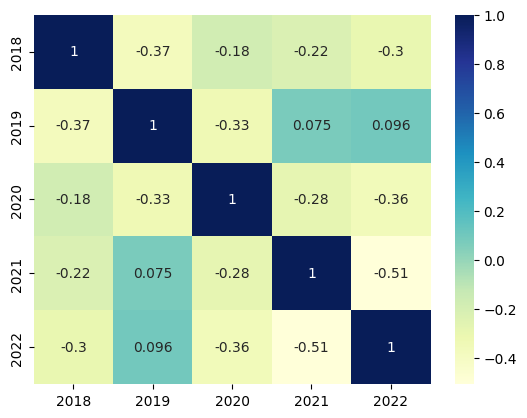

In [25]:
sns.heatmap(X_sparse_tsvd_df.corr(), cmap="YlGnBu", annot=True)